In [ ]:
import random
from math import exp
from math import log
from copy import copy, deepcopy
from collections import deque
import matplotlib.pyplot as plt 

In [ ]:
def plot_graph(x, y, title):
  plt.plot(x, y) 
  plt.xlabel('number of generations') 
  plt.ylabel('best fitness value') 
  plt.title(title) 
  plt.show() 

In [ ]:
def fitnessFunctQ(state):
    row = {}
    diagnol_1 = {}
    diagnol_2 = {}
    for idx in range(-30, 30):
      diagnol_1[idx] = 0
      diagnol_2[idx] = 0
      row[idx] = 0
    fitness_val = 29
    for index in range(len(state)):
      fitness_val -= row[state[index]]
      fitness_val -= diagnol_1[state[index] + index]
      fitness_val -= diagnol_2[state[index] - index]
      row[state[index]]+=1
      diagnol_2[state[index] - index]+=1
      diagnol_1[state[index] + index]+=1
    return fitness_val

In [ ]:
def mutateQ(child):
    mutate_pos = random.randrange(0, 8, 1)
    mutate_val = random.randrange(1, 9, 1)
    child[mutate_pos] = mutate_val
    return child;

In [ ]:
def reproduceChildQ(parent_1, parent_2, iteration):
    num_par_1 = random.randrange(1, 8, 1);
    child = []
    for index in range(0, num_par_1):
      child.append(parent_1[index])
    for index in range(num_par_1, 8):
      child.append(parent_2[index]);
    rval = random.random();
    if rval >= 0.4 or (iteration<=100 and rval >= 0.1):
      child = mutateQ(child)
    return child

In [ ]:
def main_naive_Q(seed_val):
    random.seed(seed_val)
    cur_state = [[1]*8]*20
    next_state = [[1]*8]*20
    cur_fitness = [0]*20
    idx_list = [0]*20
    prob_selection = [0]*20
    index_of_final_state = 0
    list_x = []
    list_y =[]
    for iterations in range(0, 10000):
      best_fitness = 0
      flag = 0
      for index in range(0, 20):
        cur_fitness[index] = fitnessFunctQ(cur_state[index])
        prob_selection[index] = cur_fitness[index]
        idx_list[index] = index
        best_fitness = max(best_fitness, cur_fitness[index])
        if cur_fitness[index] == 29 :
          flag = 1
          index_of_final_state = index
      for index in range(0, 20):
        parents = random.choices(idx_list, prob_selection, k = 2);
        next_state[index] = reproduceChildQ(cur_state[parents[0]], cur_state[parents[1]], iterations)
      cur_state = deepcopy(next_state)
      list_x.append(iterations+1)
      list_y.append(best_fitness)
      if flag == 1 :
        print("Number of iterations needed to converge = ",iterations)
        break
    print("The state with the best fitness value is = ", cur_state[index_of_final_state])
    print("Best fitness value = ", cur_fitness[index_of_final_state])
    plot_graph(list_x, list_y, "8 Queens (Naive)")

In [ ]:
def mutateOpQ(child):
    mutate_pos = random.randrange(0, 8, 1)
    val_remaining = set()
    for num in range(1, 9, 1):
      val_remaining.add(num)
    for num in child:
      val_remaining.discard(num)
    rem_list = []
    for num in val_remaining: 
      rem_list.append(num)
    if len(rem_list)==0:
      mutate_pos2 = random.randrange(0, 8, 1)
      child[mutate_pos], child[mutate_pos2] = child[mutate_pos2], child[mutate_pos]
      return child
    mutate_val = random.choice(rem_list)
    child[mutate_pos] = mutate_val
    return child

In [ ]:
def reproduceChildOpQ(parent_1, parent_2, iteration):
    num_par_1 = random.randrange(1, 8, 1);
    child = []
    for index in range(0, num_par_1):
      child.append(parent_1[index])
    for index in range(num_par_1, 8):
      child.append(parent_2[index]);
    rval = random.random();
    if rval >= 0.4 or (iteration<=100 and rval >= 0.1):
      child = mutateOpQ(child)
    return child

In [ ]:
def main_optimised_Q(seed_val):
    random.seed(seed_val)
    cur_state = [[1]*8]*20
    next_state = [[1]*8]*20
    cur_fitness = [0]*20
    idx_list = [0]*20
    index_of_final_state = 0
    prob_selection = [0]*20
    list_x = []
    list_y =[]
    for iterations in range(0, 10000):
      flag = 0
      best_fitness = 0
      for index in range(0, 20):
        cur_fitness[index] = fitnessFunctQ(cur_state[index])
        prob_selection[index] = cur_fitness[index] ** 2
        idx_list[index] = index
        best_fitness = max(best_fitness, cur_fitness[index])
        if cur_fitness[index] == 29 :
          flag = 1
          index_of_final_state = index
      for index in range(0, 20):
        parents = random.choices(idx_list, prob_selection, k = 2);
        next_state[index] = reproduceChildOpQ(cur_state[parents[0]], cur_state[parents[1]], iterations)
      cur_state = deepcopy(next_state)
      list_x.append(iterations+1)
      list_y.append(best_fitness)
      if flag == 1 :
        print("Number of iterations needed to converge = ",iterations)
        break
    print("The state with the best fitness value is = ", cur_state[index_of_final_state])
    print("Best fitness value = ", cur_fitness[index_of_final_state])
    plot_graph(list_x, list_y, "8 Queens (Optimised)") 

In [ ]:
inf = 100000
dis = [[0]*20]*20
dis[0]  = [0, inf, inf, inf, inf, inf, 150, inf, inf, 200, inf, 120, inf, inf]
dis[1]  = [inf, 0, inf, inf, inf, inf, inf, 190, 400, inf, inf, inf, inf, 130]
dis[2]  = [inf, inf, 0, 600, 220, 400, inf, inf, 200, inf, inf, inf, inf, inf]
dis[3]  = [inf, inf, 600, 0, inf, 210, inf, inf, inf, inf, 300, inf, inf, inf]
dis[4]  = [inf, inf, 220, inf, 0, inf, inf, inf, 180, inf, inf, inf, inf, inf]
dis[5]  = [inf, inf, 400, 210, inf, 0, inf, inf, inf, inf, 370, 600, 260, 900]
dis[6]  = [150, inf, inf, inf, inf, inf, 0, inf, inf, inf, 550, 180, inf, inf]
dis[7]  = [inf, 190, inf, inf, inf, inf, inf, 0, inf, 560, inf, inf, inf, 170]
dis[8]  = [inf, 400, 200, inf, 180, inf, inf, inf, 0, inf, inf, inf, inf, 600]
dis[9]  = [200, inf, inf, inf, inf, inf, inf, 560, inf, 0, inf, 160, inf, 500]
dis[10] = [inf, inf, inf, 300, inf, 370, 550, inf, inf, inf, 0, inf, 240, inf]
dis[11] = [120, inf, inf, inf, inf, 600, 180, inf, inf, 160, inf, 0, 400, inf]
dis[12] = [inf, inf, inf, inf, inf, 260, inf, inf, inf, inf, 240, 400, 0, inf]
dis[13] = [inf, 130, inf, inf, inf, 900, inf, 170, 600, 500, inf, inf, inf, 0]  

In [ ]:
def fitnessFunctT(state):
    fitness_val = 0
    for index in range(1,15, 1):
      fitness_val += dis[ord(state[index-1]) - 65][ord(state[index%14]) - 65]
    fitness_val = 1/fitness_val
    return fitness_val

In [ ]:
def reproduceChildT(parent_1, parent_2, iteration):
    left_index = random.randrange(0, 13, 1)
    right_index = random.randrange(left_index+1, 14, 1)
    child = [0]*14
    cities_left = set()
    for asc in range(65, 79, 1):
      cities_left.add(chr(asc))
    for index in range(left_index, right_index+1, 1):
      child[index] = parent_1[index]
      cities_left.discard(child[index])
    index_child = 0;
    for index in range(0, 14, 1):
      if index_child == left_index:
        index_child = right_index+1
      prev = len(cities_left)
      cities_left.discard(parent_2[index])
      cur = len(cities_left)
      if prev == cur+1:
        child[index_child] = parent_2[index]
        index_child += 1
    rval = random.random();
    if rval >= 0.4 or (iteration<=1000 and rval >= 0.1):
      child = mutateT(child)
    return child

In [ ]:
def mutateT(child):
  mutate_pos1 = random.randrange(0, 13, 1)
  mutate_pos2 = random.randrange(mutate_pos1+1, 14, 1)
  child[mutate_pos1], child[mutate_pos2] = child[mutate_pos2], child[mutate_pos1]
  return child

In [ ]:
def main_naive_T(seed_val):
    random.seed(seed_val)
    cur_state = [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]*20
    next_state = [[1]*14]*20
    cur_fitness = [0]*20
    idx_list = [0]*20
    best_fitness = 0
    answer_state = [0]*14
    list_fitness = deque()
    list_x = []
    list_y = []
    X = 100
    for iterations in range(0, 40000):
      flag = 0
      bc_fitness = 0
      for index in range(0, 20):
        cur_fitness[index] = fitnessFunctT(cur_state[index])
        if best_fitness < cur_fitness[index]:
          answer_state = deepcopy(cur_state[index])
        bc_fitness = max(bc_fitness, cur_fitness[index])
        best_fitness = max(best_fitness, cur_fitness[index])
        idx_list[index] = index
      for index in range(0, 20):
        parents = random.choices(idx_list, cur_fitness, k = 2);
        next_state[index] = reproduceChildT(cur_state[parents[0]], cur_state[parents[1]], iterations)
      cur_state = deepcopy(next_state)
      list_fitness.append(1/best_fitness)
      list_x.append(iterations)
      list_y.append(bc_fitness)
      if len(list_fitness) == X+1:
        list_fitness.popleft()
      if 1/best_fitness < inf and len(list_fitness) == X and list_fitness[0] - 100 < list_fitness[X-1]:
        print("Number of iterations needed to converge = ",iterations)
        break
    print("The state with the best fitness value is = ", answer_state)
    print("Best fitness value = ", round(1/(best_fitness))) 
    plot_graph(list_x, list_y, "Travelling Salesman (Naive)")

In [ ]:
def reproduceChildOpT(parent_1, parent_2, iteration):
    num_ele_par1 = random.randrange(1, 14, 1);
    left_index = 0
    right_index = num_ele_par1-1
    connections = 0
    for start_ind in range(0, 14-num_ele_par1-1, 1):
      temp_conn = 0
      for i in range(1, num_ele_par1, 1):
        if dis[ord(parent_1[start_ind+i-1])-65][ord(parent_1[start_ind+i])-65]!=inf:
          temp_conn+=1
      if connections<temp_conn:
        left_index = start_ind
        right_index = start_ind+num_ele_par1-1
    child = [0]*14
    cities_left = set()
    for asc in range(65, 79, 1):
      cities_left.add(chr(asc))
    for index in range(left_index, right_index+1, 1):
      child[index] = parent_1[index]
      cities_left.discard(child[index])
    index_child = 0;
    for index in range(0, 14, 1):
      if index_child == left_index:
        index_child = right_index+1
      prev = len(cities_left)
      cities_left.discard(parent_2[index])
      cur = len(cities_left)
      if prev == cur+1:
        child[index_child] = parent_2[index]
        index_child += 1
    rval = random.random();
    if rval >= 0.4 or (iteration<=1000 and rval >= 0.1):
      child = mutateT(child)
    return child

In [ ]:
def main_optimised_T(seed_val):
    random.seed(seed_val)
    cur_state = [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]*20
    next_state = [[1]*14]*20
    cur_fitness = [0]*20
    prob_selection = [0]*20
    idx_list = [0]*20
    best_fitness = 0
    answer_state = [0]*14
    list_fitness = deque()
    list_x = []
    list_y = []
    X = 100
    for iterations in range(0, 10000):
      flag = 0
      bc_fitness = 0
      for index in range(0, 20):
        cur_fitness[index] = fitnessFunctT(cur_state[index])
        if best_fitness < cur_fitness[index]:
          answer_state = deepcopy(cur_state[index])
        bc_fitness = max(bc_fitness, cur_fitness[index])
        best_fitness = max(best_fitness, cur_fitness[index])
        prob_selection[index] = cur_fitness[index] ** 2
        idx_list[index] = index
      for index in range(0, 20):
        parents = random.choices(idx_list, prob_selection, k = 2);
        child_1 = reproduceChildOpT(cur_state[parents[0]], cur_state[parents[1]], iterations)
        child_2 = reproduceChildOpT(cur_state[parents[1]], cur_state[parents[0]], iterations)
        if fitnessFunctT(child_1) < fitnessFunctT(child_2):
          child_1 = child_2
        next_state[index] = child_1
      cur_state = deepcopy(next_state)
      list_fitness.append(1/best_fitness)
      list_x.append(iterations)
      list_y.append(bc_fitness)
      if len(list_fitness) == X+1:
        list_fitness.popleft()
      if 1/best_fitness < inf and len(list_fitness) == X and list_fitness[0] - 100 < list_fitness[X-1]:
        print("Number of iterations needed to converge = ",iterations)
        break
    print("The state with the best fitness value is = ", answer_state)
    print("Best fitness value = ", round(1/(best_fitness))) 
    plot_graph(list_x, list_y, "Travelling Salesman (Optimised)")

In [ ]:
# main_naive_Q(13)
# main_optimised_Q(13)
# main_naive_T(13)
#main_optimised_T(13)

In [ ]:
def main():
  print("Press 1 for 8-Queens and 2 for Travelling Salesman problem")
  choice = input("Enter your value: ")
  if choice == "1":
    main_optimised_Q(13)
  else:
    main_optimised_T(13)

Press 1 for 8-Queens and 2 for Travelling Salesman problem
Enter your value: 2
Number of iterations needed to converge =  150
The state with the best fitness value is =  ['C', 'E', 'I', 'B', 'N', 'H', 'J', 'A', 'G', 'L', 'M', 'K', 'D', 'F']
Best fitness value =  3740


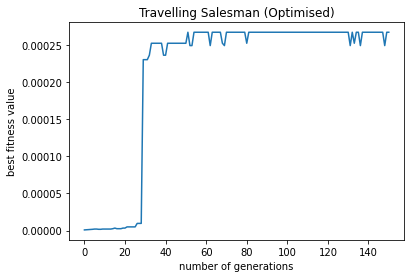

In [ ]:
main()